In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
# Load MNIST dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 38s 3us/step


In [4]:
# Reshape to (n, 28, 28, 1) since MNIST is grayscale
X_train = X_train.reshape(len(X_train), 28, 28, 1) / 255.0
X_test = X_test.reshape(len(X_test), 28, 28, 1) / 255.0

In [5]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (60000, 28, 28, 1)
Shape of Y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of Y_test: (10000,)


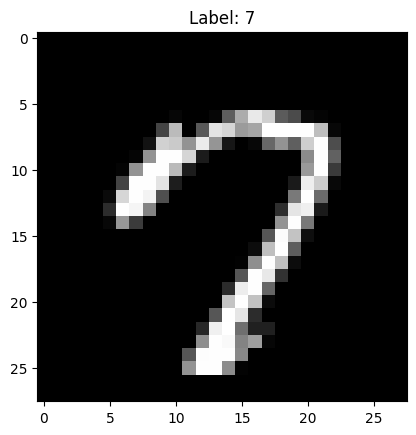

In [6]:
# Show a random training image
idx = random.randint(0, len(X_train)-1)
plt.imshow(X_train[idx].reshape(28,28), cmap='gray')
plt.title(f"Label: {Y_train[idx]}")
plt.show()

In [7]:
# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 classes for digits 0–9

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Train model
model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 60ms/step - accuracy: 0.8672 - loss: 0.4271 - val_accuracy: 0.9807 - val_loss: 0.0634
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.9820 - loss: 0.0575 - val_accuracy: 0.9858 - val_loss: 0.0476
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 59ms/step - accuracy: 0.9886 - loss: 0.0357 - val_accuracy: 0.9877 - val_loss: 0.0391
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 61ms/step - accuracy: 0.9912 - loss: 0.0266 - val_accuracy: 0.9886 - val_loss: 0.0387
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 63ms/step - accuracy: 0.9931 - loss: 0.0213 - val_accuracy: 0.9855 - val_loss: 0.0507


In [10]:
# Evaluate
loss, acc = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9846 - loss: 0.0493
Test Accuracy: 0.9879


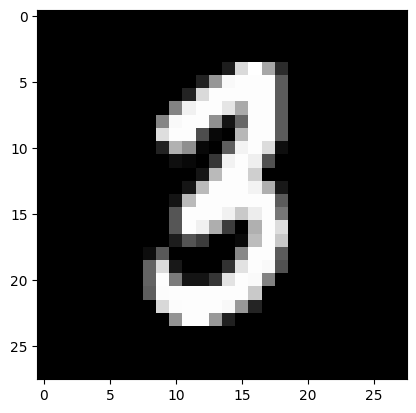

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
Our model says it is a: 3
True label is: 3


In [11]:
# Predict on a random test image
idx2 = random.randint(0, len(X_test)-1)
plt.imshow(X_test[idx2].reshape(28,28), cmap='gray')
plt.show()

y_pred = model.predict(X_test[idx2].reshape(1, 28, 28, 1))
pred_label = np.argmax(y_pred)

print("Our model says it is a:", pred_label)
print("True label is:", Y_test[idx2])